In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [5]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
train.shape , test.shape

((891, 12), (418, 11))

In [9]:
train['Cabin'] = train['Cabin'].replace({'\d+': '', 'NaN': '0', 'B': '1', 'C': '2', 'D': '3', 'E': '4', 'F': '5', 'G': '6', 'T': '7','A':'8'},regex = True)
test['Cabin'] = test['Cabin'].replace({'\d+': '', 'NaN': '0', 'B': '1', 'C': '2', 'D': '3', 'E': '4', 'F': '5', 'G': '6', 'T': '7','A':'8'},regex = True)
#замена номера кабины на число, как разобраться с номером кабины не решил

In [10]:
train['Embarked'].replace(['Q', 'S', 'C'],[0,1,2],inplace = True)
test['Embarked'].replace(['Q', 'S', 'C'],[0,1,2],inplace = True)
#замена замена места посадки 

In [11]:
train['Sex'].replace(['male','female'],[0,1],inplace = True)
test['Sex'].replace(['male','female'],[0,1],inplace = True)

In [12]:
train.drop(['Name'],axis=1,inplace= True)

In [13]:
train.drop(['Ticket'],axis=1,inplace= True)
#удаляю билеты, т.к. считаю, что этот столбец неважным

In [14]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [15]:
x_train['Cabin']= x_train['Cabin'].str.split().str.get(0)


In [16]:
x_train['Cabin'] = x_train['Cabin'].fillna(0)
#заменяю NaN на 0 

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    object 
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [18]:
age_mean = round(x_train['Age'].mean())

In [19]:
df_age_less_18 = x_train[x_train['Age']<18]

In [20]:
df_age_less_18['Age'].value_counts()

Age
16.00    17
17.00    13
2.00     10
4.00     10
9.00      8
1.00      7
3.00      6
14.00     6
15.00     5
11.00     4
5.00      4
8.00      4
6.00      3
7.00      3
10.00     2
0.75      2
13.00     2
0.83      2
0.92      1
12.00     1
14.50     1
0.67      1
0.42      1
Name: count, dtype: int64

Т.к. средний возраст пассажиров 29, а из числа пассажиров существенная часть составляет подроски, то заменяю пропуски на среднее

In [21]:
x_train['Age'].fillna(age_mean, inplace = True)

In [22]:
x_train['Embarked'].fillna(1, inplace = True)

In [23]:
x_train['Age'].value_counts()

Age
30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [24]:
test_mean = round(test['Age'].mean())

In [25]:
test['Age'].fillna(test_mean,inplace = True)

In [26]:
test.drop(['Ticket','Name'],axis=1,inplace= True)

In [51]:
test.drop(['PassengerId'],axis=1,inplace= True)

In [53]:
x_train.drop(['PassengerId'],axis=1,inplace= True)

KeyError: "['PassengerId'] not found in axis"

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [ ]:
test['Cabin'] = test['Cabin'].str.split().str.get(0)

In [54]:
test['Cabin'].fillna(0,inplace = True)

In [55]:
test['Fare'].fillna(test['Fare'].mean(),inplace = True)

In [56]:
from sklearn.ensemble import  RandomForestClassifier

In [57]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
predictions = model.predict(test)

In [59]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

([<matplotlib.axis.YTick at 0x1b94bf0f650>,
 [Text(0, 0, 'Pclass'),
  Text(0, 1, 'Sex'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch'),
  Text(0, 5, 'Fare'),
  Text(0, 6, 'Cabin'),
  Text(0, 7, 'Embarked')])

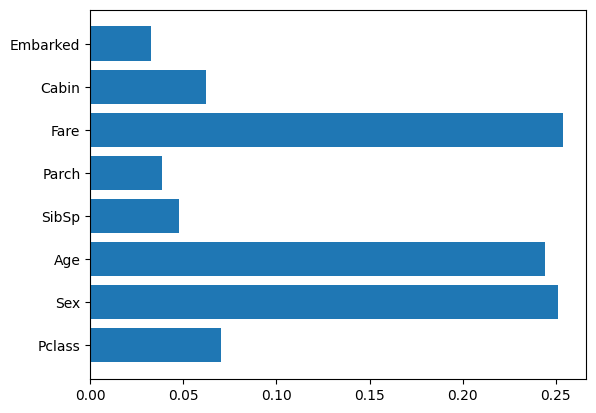

In [60]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(x_train.columns)),x_train.columns)

([<matplotlib.axis.YTick at 0x1b94c3cbfd0>,
 [Text(0, 0, 'Pclass'),
  Text(0, 1, 'Sex'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch'),
  Text(0, 5, 'Fare'),
  Text(0, 6, 'Cabin'),
  Text(0, 7, 'Embarked')])

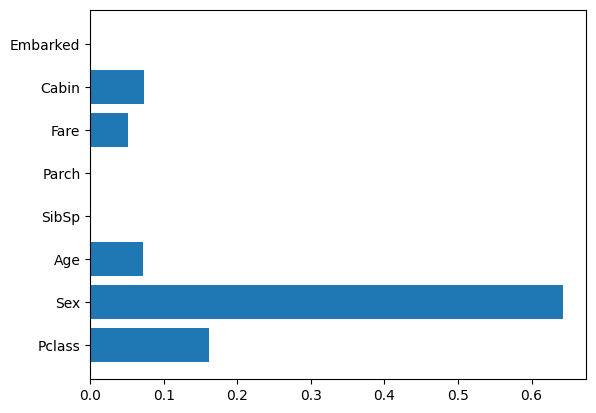

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(x_train.columns)),x_train.columns)

In [47]:
predictions_des = clf.predict(test)

In [49]:
predictions_des

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Negative'),
 Text(0.25, 0.625, 'Cabin <= 0.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Negative'),
 Text(0.125, 0.375, 'Age <= 3.5\ngini = 0.235\nsamples = 470\nvalue = [406, 64]\nclass = Negative'),
 Text(0.0625, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Positive'),
 Text(0.1875, 0.125, 'gini = 0.212\nsamples = 456\nvalue = [401, 55]\nclass = Negative'),
 Text(0.375, 0.375, 'Age <= 17.5\ngini = 0.487\nsamples = 107\nvalue = [62, 45]\nclass = Negative'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = Positive'),
 Text(0.4375, 0.125, 'gini = 0.468\nsamples = 99\nvalue = [62, 37]\nclass = Negative'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Positive'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Positive'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 2\n

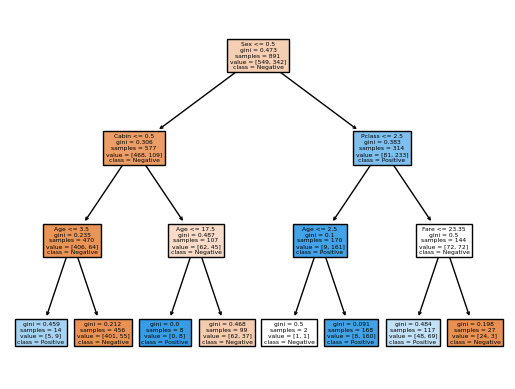

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tree.plot_tree(clf, feature_names=list(x_train),
               class_names = ['Negative','Positive'],
               filled = True)

In [62]:
df = pd.read_csv('titanic_train.csv')

In [74]:
 df['Age'].fillna(age_mean,inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
df['Embarked'].fillna('S',inplace = True)

In [79]:
df['Cabin'] = df['Cabin'].str.get(0)

<Axes: xlabel='Sex', ylabel='count'>

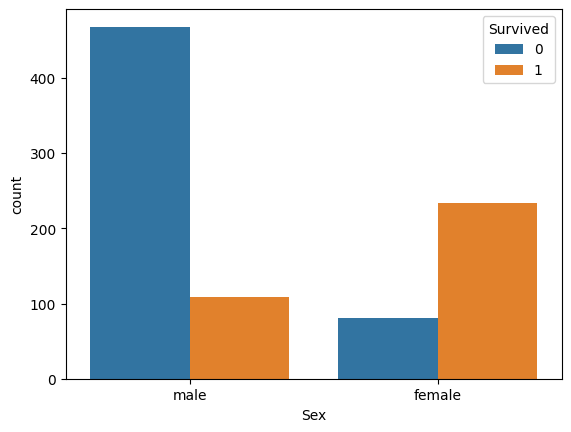

In [85]:
sns.countplot(data=df,x='Sex',hue='Survived')

<Axes: xlabel='Cabin', ylabel='count'>

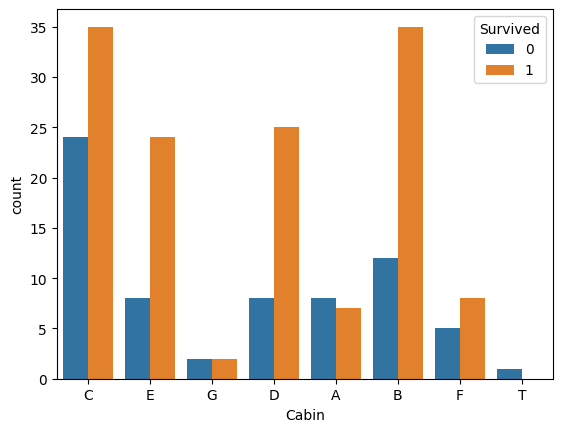

In [87]:
sns.countplot(data=df,x='Cabin',hue='Survived')

In [92]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 60, float('inf')], labels=['<18', '18-60', '60+'])
#создаем доп столбец с разделением по возрастным группам

<Axes: xlabel='AgeGroup', ylabel='count'>

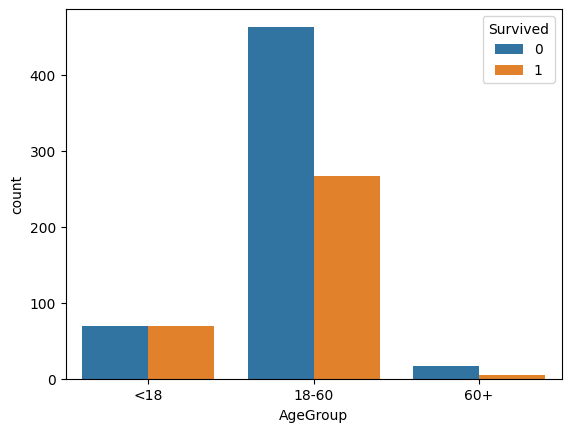

In [93]:
sns.countplot(data=df,x='AgeGroup',hue='Survived')

In [112]:
df['Fare'] = round(df['Fare'])

In [121]:
df['Fare'].describe()

count    891.000000
mean      32.214366
std       49.693352
min        0.000000
25%        8.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [123]:
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 8, 14,31, float('inf')], labels=['<8', '8-14', '14-31','31+'])

<Axes: xlabel='FareGroup', ylabel='count'>

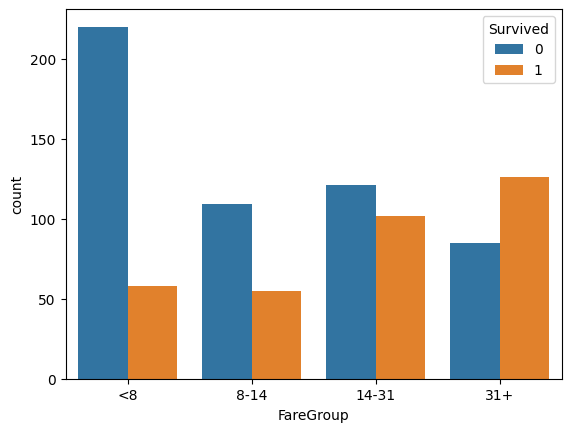

In [124]:
sns.countplot(data=df,x='FareGroup',hue='Survived')

In [125]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup',
       'FareGroup'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='count'>

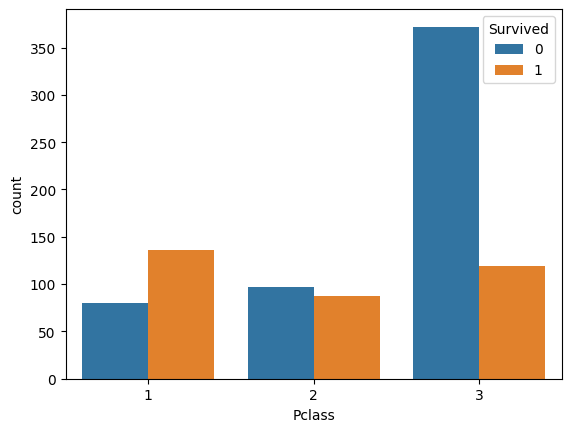

In [131]:
sns.countplot(data=df,x='Pclass',hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

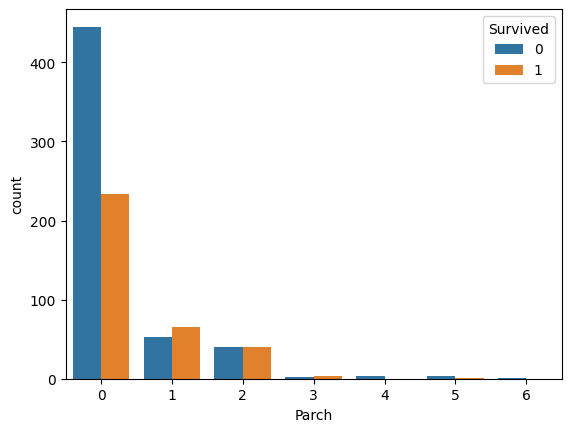

In [128]:
sns.countplot(data=df,x='Parch',hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

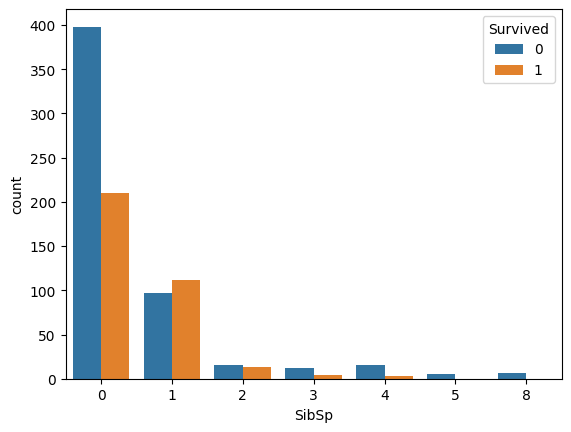

In [134]:

sns.countplot(data=df,x='SibSp',hue='Survived')

Вывод: пол-самый важный критерий по выживаемости. можно сказать, что и возраст влияет на выживаемость, т.к. половина детей младше 18 выжили, чего не сказать о других возрастных группах. Так же палубы влияли на то спасется человек или нет, так палубы B,D,E показали самое большое кол-во выживших к погибшим. Так же достаток влияет. из 1-ого класса много выживших, а если посмотреть разделение по стоимости билета, то при стоимости билета больше 31 шансы выжить были велики. 

Если говорить о влиянии кол-во членов семьи на выживаемость. кол-во детей влияло на выживаемость, так от 1 до 3 Parch на борту повышали шансы на спасение. Так же 1-2 SibSp повышали шансы